In [3]:
import numpy as np
import pandas as pd
from PIL import Image

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

#!conda install -c conda-forge wordcloud==1.4.1 --yes

from wordcloud import WordCloud, STOPWORDS

print('wordcloud is installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    certifi-2019.3.9           |           py36_0         149 KB  conda-forge
    conda-4.6.8                |           py36_0         876 KB  conda-forge
    openssl-1.1.1b             |       h14c3975_1         4.0 MB  conda-forge
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.4 MB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/linux-64::wordcloud-1.4.1-py36_0

The following packages will be UPDATED:

  ca-certificates                  

In [5]:
DEL_CUISINE = pd.read_csv("data2.csv")

In [6]:
DEL_CUISINE.head()

,Districts,Neighbourhood,Cuisine
0,North West Delhi,Adarsh Nagar,"South Indian,Mughlai,Afghani"
1,North West Delhi,Ashok Vihar,"Chinese,Italian"
2,North West Delhi,Azadpur,"Kashmiri,Afghani,Japanese"
3,North West Delhi,Bawana,"Oriental,Janpanese,Kashmiri,Mughlai"
4,North West Delhi,Begum Pur,"Chinese,Italian"


In [7]:
DEL_CUISINE.shape

(177, 3)

In [8]:
DEL_CUISINE.Districts.value_counts().to_frame()

,Districts
South Delhi,48
North Delhi,25
South West Delhi,21
East Delhi,19
West Delhi,19
North West Delhi,18
North East Delhi,13
New Delhi,10
Central Delhi,4


# Delhi City Word Cloud

In [9]:
CUISINE_WC = DEL_CUISINE[['Cuisine']]
CUISINE_WC

,Cuisine
0,"South Indian,Mughlai,Afghani"
1,"Chinese,Italian"
2,"Kashmiri,Afghani,Japanese"
3,"Oriental,Janpanese,Kashmiri,Mughlai"
4,"Chinese,Italian"
5,Italian
6,"South Indian,Mughlai"
7,South Indian
8,Japanese
9,"Chinese,Italian"


In [10]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

In [11]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

## Use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords.

In [12]:
stopwords = set(STOPWORDS)

In [13]:
# instantiate a word cloud object
DEL_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
DEL_CUISINE_WC.generate(CUISINE_WC1)

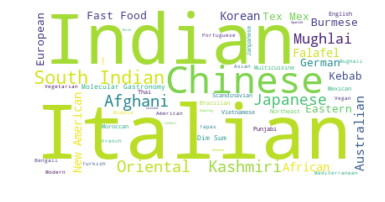

<Figure size 2160x3240 with 0 Axes>

In [14]:
# The word cloud is created, let's visualize it.

# display the word cloud
plt.imshow(DEL_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

## South Delhi Cuisines Word Cloud

In [15]:
south_delhi_data = DEL_CUISINE[DEL_CUISINE['Districts'] == 'South Delhi'].reset_index(drop=True)
south_delhi_data.head()

,Districts,Neighbourhood,Cuisine
0,South Delhi,Alaknanda,African
1,South Delhi,Chhattarpur,Australian
2,South Delhi,Chittaranjan Park,Burmese
3,South Delhi,Dayanand Colony,Dim Sum
4,South Delhi,Defence Colony,English


In [16]:
south_delhi_CUISINE_WC = south_delhi_data[['Cuisine']]
south_delhi_CUISINE_WC

,Cuisine
0,African
1,Australian
2,Burmese
3,Dim Sum
4,English
5,French
6,Indian
7,Kebab
8,Mexican
9,Molecular Gastronomy


In [17]:
south_delhi_CUISINE_WC.to_csv('south_delhi_CUISINE.txt', sep=',', index=False)

In [18]:
south_delhi_CUISINE_WC = open('south_delhi_CUISINE.txt', 'r').read()

In [19]:
stopwords = set(STOPWORDS)

In [20]:

# instantiate a word cloud object
south_delhi_CUISINE_DL = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
south_delhi_CUISINE_DL.generate(south_delhi_CUISINE_WC)

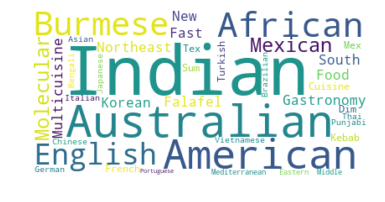

<Figure size 2160x3240 with 0 Axes>

In [21]:
# display the word cloud
plt.imshow(south_delhi_CUISINE_DL, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

## North Delhi CUISINE - WORD CLOUD

In [22]:
north_delhi_data = DEL_CUISINE[DEL_CUISINE['Districts'] == 'North Delhi'].reset_index(drop=True)
north_delhi_data.head()

,Districts,Neighbourhood,Cuisine
0,North Delhi,Bara Hindu Rao,"South Indian,Japanese"
1,North Delhi,Chandni Chowk,"Kashmiri,Afghani"
2,North Delhi,Chawri Bazaar,"Chinese,Italian"
3,North Delhi,Civil Lines,Italian
4,North Delhi,Dariba Kalan,Kashmiri


In [23]:
north_delhi_CUISINE_WC = north_delhi_data[['Cuisine']]
north_delhi_CUISINE_WC

,Cuisine
0,"South Indian,Japanese"
1,"Kashmiri,Afghani"
2,"Chinese,Italian"
3,Italian
4,Kashmiri
5,"Chinese,Italian"
6,"South Indian,Afghani"
7,"Japanese,Oriental"
8,"Oriental,Janpanese,Kashmiri,Mughlai"
9,"Oriental,Janpanese,Kashmiri"


In [24]:
north_delhi_CUISINE_WC.to_csv('north_delhi_CUISINE.txt', sep=',', index=False)

In [25]:
north_delhi_CUISINE_WC = open('north_delhi_CUISINE.txt', 'r').read()

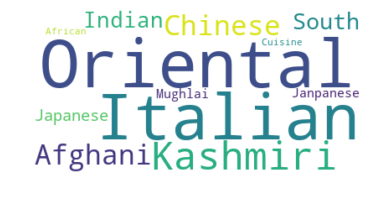

<Figure size 2160x3240 with 0 Axes>

In [26]:
stopwords = set(STOPWORDS)


# instantiate a word cloud object
north_delhi_CUISINE_DL = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
north_delhi_CUISINE_DL.generate(north_delhi_CUISINE_WC)

# display the word cloud
plt.imshow(north_delhi_CUISINE_DL, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

## South West Delhi CUISINE - WORD CLOUD

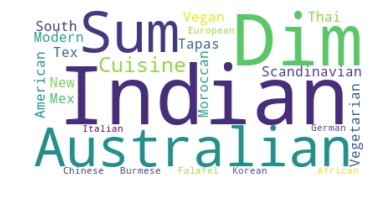

<Figure size 2160x3240 with 0 Axes>

In [27]:
south_west_delhi_data = DEL_CUISINE[DEL_CUISINE['Districts'] == 'South West Delhi'].reset_index(drop=True)
south_west_delhi_data.head()

south_west_delhi_CUISINE_WC = south_west_delhi_data[['Cuisine']]
south_west_delhi_CUISINE_WC

south_west_delhi_CUISINE_WC.to_csv('south_west_delhi_CUISINE.txt', sep=',', index=False)

south_west_delhi_CUISINE_WC = open('south_west_delhi_CUISINE.txt', 'r').read()

stopwords = set(STOPWORDS)


# instantiate a word cloud object
south_west_delhi_CUISINE_DL = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
south_west_delhi_CUISINE_DL.generate(south_west_delhi_CUISINE_WC)

# display the word cloud
plt.imshow(south_west_delhi_CUISINE_DL, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()


## East Delhi CUISINE - WORD CLOUD

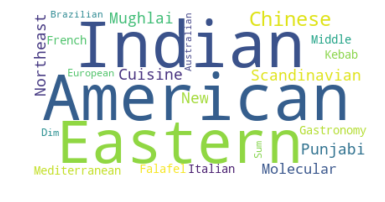

<Figure size 2160x3240 with 0 Axes>

In [28]:
east_delhi_data = DEL_CUISINE[DEL_CUISINE['Districts'] == 'East Delhi'].reset_index(drop=True)
east_delhi_data.head()

east_delhi_CUISINE_WC = east_delhi_data[['Cuisine']]
east_delhi_CUISINE_WC

east_delhi_CUISINE_WC.to_csv('east_delhi_CUISINE.txt', sep=',', index=False)

east_delhi_CUISINE_WC = open('east_delhi_CUISINE.txt', 'r').read()

stopwords = set(STOPWORDS)


# instantiate a word cloud object
east_delhi_CUISINE_DL = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
east_delhi_CUISINE_DL.generate(east_delhi_CUISINE_WC)

# display the word cloud
plt.imshow(east_delhi_CUISINE_DL, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()


## West Delhi CUISINE - WORD CLOUD

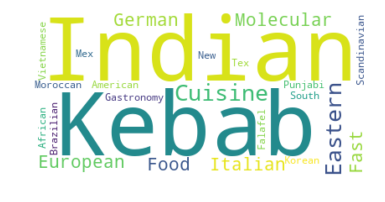

<Figure size 2160x3240 with 0 Axes>

In [29]:
west_delhi_data = DEL_CUISINE[DEL_CUISINE['Districts'] == 'West Delhi'].reset_index(drop=True)
west_delhi_data.head()

west_delhi_CUISINE_WC = west_delhi_data[['Cuisine']]
west_delhi_CUISINE_WC

west_delhi_CUISINE_WC.to_csv('west_delhi_CUISINE.txt', sep=',', index=False)

west_delhi_CUISINE_WC = open('west_delhi_CUISINE.txt', 'r').read()

stopwords = set(STOPWORDS)


# instantiate a word cloud object
west_delhi_CUISINE_DL = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
west_delhi_CUISINE_DL.generate(west_delhi_CUISINE_WC)

# display the word cloud
plt.imshow(west_delhi_CUISINE_DL, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()


## North West Delhi CUISINE - WORD CLOUD

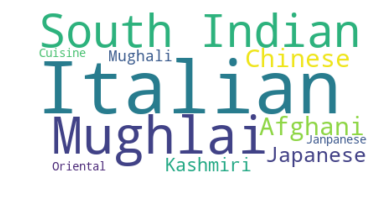

<Figure size 2160x3240 with 0 Axes>

In [30]:
north_west_delhi_data = DEL_CUISINE[DEL_CUISINE['Districts'] == 'North West Delhi'].reset_index(drop=True)
north_west_delhi_data.head()

north_west_delhi_CUISINE_WC = north_west_delhi_data[['Cuisine']]
north_west_delhi_CUISINE_WC

north_west_delhi_CUISINE_WC.to_csv('north_west_delhi_CUISINE.txt', sep=',', index=False)

north_west_delhi_CUISINE_WC = open('north_west_delhi_CUISINE.txt', 'r').read()

stopwords = set(STOPWORDS)


# instantiate a word cloud object
north_west_delhi_CUISINE_DL = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
north_west_delhi_CUISINE_DL.generate(north_west_delhi_CUISINE_WC)

# display the word cloud
plt.imshow(north_west_delhi_CUISINE_DL, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()


## North East Delhi CUISINE - WORD CLOUD

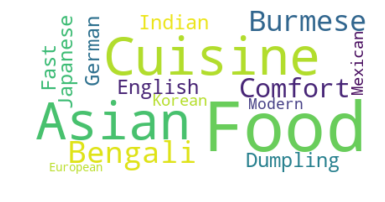

<Figure size 2160x3240 with 0 Axes>

In [31]:
north_east_delhi_data = DEL_CUISINE[DEL_CUISINE['Districts'] == 'North East Delhi'].reset_index(drop=True)
north_east_delhi_data.head()

north_east_delhi_CUISINE_WC = north_east_delhi_data[['Cuisine']]
north_east_delhi_CUISINE_WC

north_east_delhi_CUISINE_WC.to_csv('north_east_delhi_CUISINE.txt', sep=',', index=False)

north_east_delhi_CUISINE_WC = open('north_east_delhi_CUISINE.txt', 'r').read()

stopwords = set(STOPWORDS)


# instantiate a word cloud object
north_east_delhi_CUISINE_DL = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
north_east_delhi_CUISINE_DL.generate(north_east_delhi_CUISINE_WC)

# display the word cloud
plt.imshow(north_east_delhi_CUISINE_DL, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()


## New Delhi CUISINE - WORD CLOUD

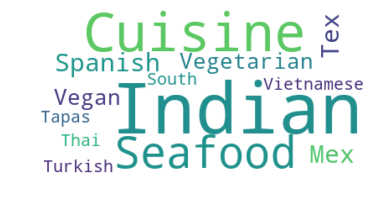

<Figure size 2160x3240 with 0 Axes>

In [32]:
new_delhi_data = DEL_CUISINE[DEL_CUISINE['Districts'] == 'New Delhi'].reset_index(drop=True)
new_delhi_data.head()

new_delhi_CUISINE_WC = new_delhi_data[['Cuisine']]
new_delhi_CUISINE_WC

new_delhi_CUISINE_WC.to_csv('new_delhi_CUISINE.txt', sep=',', index=False)

new_delhi_CUISINE_WC = open('new_delhi_CUISINE.txt', 'r').read()

stopwords = set(STOPWORDS)


# instantiate a word cloud object
new_delhi_CUISINE_DL = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
new_delhi_CUISINE_DL.generate(new_delhi_CUISINE_WC)

# display the word cloud
plt.imshow(new_delhi_CUISINE_DL, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()


## Central Delhi CUISINE - WORD CLOUD

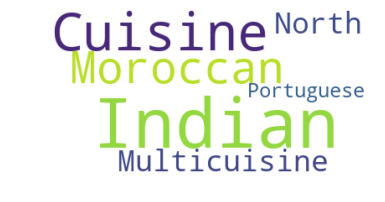

<Figure size 2160x3240 with 0 Axes>

In [33]:
central_delhi_data = DEL_CUISINE[DEL_CUISINE['Districts'] == 'Central Delhi'].reset_index(drop=True)
central_delhi_data.head()

central_delhi_CUISINE_WC = central_delhi_data[['Cuisine']]
central_delhi_CUISINE_WC

central_delhi_CUISINE_WC.to_csv('central_delhi_CUISINE.txt', sep=',', index=False)

central_delhi_CUISINE_WC = open('central_delhi_CUISINE.txt', 'r').read()

stopwords = set(STOPWORDS)


# instantiate a word cloud object
central_delhi_CUISINE_DL = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
central_delhi_CUISINE_DL.generate(central_delhi_CUISINE_WC)

# display the word cloud
plt.imshow(central_delhi_CUISINE_DL, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()
